In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [32]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [33]:
df

,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,...,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating,Previous Input,Previous Output
0,1,2,130,135,11,23.531707,0,0.390,34.921707,0.204,...,3740,274,3740,13.540444,0.001500,0.0,6.687037,6.624074,39.747073,32.643
1,1,3,135,125,12,19.678049,0,0.394,32.072049,0.203,...,3731,275,3731,13.579200,0.001582,0.0,6.624074,6.561111,34.921707,30.466
2,1,4,125,110,12,16.956098,0,0.450,29.406098,0.192,...,3764,270,3764,14.244000,0.001628,0.0,6.561111,6.498148,32.072049,28.290
3,1,5,110,115,13,17.032927,0,0.495,30.527927,0.196,...,3756,274,3756,14.192348,0.001568,0.0,6.498148,6.435185,29.406098,26.114
4,1,6,115,105,15,16.000000,0,0.470,31.470000,0.194,...,3675,275,3675,16.165714,0.001669,0.0,6.435185,6.372222,30.527927,27.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,9,59,115,130,0,34.835366,0,0.635,35.470366,0.249,...,3366,362,3366,13.476923,0.001602,8.0,4.141535,4.096561,30.009024,24.710
436,9,60,130,110,0,31.128049,0,0.585,31.713049,0.236,...,3498,328,3498,14.241818,0.001685,6.0,4.096561,4.051588,35.470366,29.200
437,9,61,110,105,0,30.079268,0,0.365,30.444268,0.212,...,3428,351,3428,14.302857,0.001637,8.0,4.051588,4.006614,31.713049,26.110
438,9,62,105,145,0,37.487805,0,0.710,38.197805,0.226,...,3210,368,3210,13.013793,0.001575,8.0,4.006614,3.961641,30.444268,25.030


In [34]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [35]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [36]:
# ## Keras NN
# ## model = Sequential()
# n_input = X_train.shape[1] # number of features
# n_hidden_1 = 500
# n_hidden_2 = 100
# n_hidden_3 = 50
# n_hidden_4 = 150
# n_hidden_5 = 100
# n_hidden_6 = 50
# n_hidden_7 = 25
# num_digits = 1
# n_output = 1

# Inp = Input(shape=(n_input,))
# x = Dense(n_hidden_1, activation='relu')(Inp)
# x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
# x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# # x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# # x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# # x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# # x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

# output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
# model = Model(Inp, output)
# model.summary() 
# learning_rate = 0.001
# training_epochs = 50
# batch_size = 5
# # sgd = optimizers.SGD(lr=learning_rate)
# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                   optimizer='adam',
#                   metrics=['mse'])
    
# model.fit(normalized_X_train, normalized_y_train,
#                          batch_size = batch_size,
#                          epochs = training_epochs,
#                          verbose = 2)


# pred_train = model.predict(normalized_X_train)
# y_pred_train = scaler2.inverse_transform(pred_train)
# pred_test = model.predict(normalized_X_test)
# y_pred_test = scaler2.inverse_transform(pred_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_input = X_train.shape[1] 
n_output = 1
model = Sequential()
model.add(Dense(n_hidden_1, input_dim=n_input, activation='relu'))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_3, activation='relu'))
model.add(Dense(n_output, activation='relu'))
# compile the keras model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
model.fit(normalized_X_train, normalized_y_train, epochs=500, batch_size=5, verbose=2)
# make class predictions with the model

pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Train on 318 samples
Epoch 1/500
318/318 - 2s - loss: 0.0102 - mse: 0.0102
Epoch 2/500
318/318 - 0s - loss: 0.0038 - mse: 0.0038
Epoch 3/500
318/318 - 0s - loss: 0.0039 - mse: 0.0039
Epoch 4/500
318/318 - 0s - loss: 0.0038 - mse: 0.0038
Epoch 5/500
318/318 - 0s - loss: 0.0040 - mse: 0.0040
Epoch 6/500
318/318 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 7/500
318/318 - 0s - loss: 0.0034 - mse: 0.0034
Epoch 8/500
318/318 - 0s - loss: 0.0036 - mse: 0.0036
Epoch 9/500
318/318 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 10/500
318/318 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 11/500
318/318 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 12/500
318/318 - 0s - loss: 0.0030 - mse: 0.0030
Epoch 13/500
318/318 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 14/500
318/318 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 15/500
318/318 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 16/500
318/318 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 17/500
318/318 - 0s - loss: 0.0030 - mse: 0.0030
Epoch 18/500
318/318 - 0s - loss: 0.0030 - mse: 0.003

Epoch 149/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 150/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 151/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 152/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 153/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 154/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 155/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 156/500
318/318 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 157/500
318/318 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 158/500
318/318 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 159/500
318/318 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 160/500
318/318 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 161/500
318/318 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 162/500
318/318 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 163/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 164/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 165/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 166/500
318/318 - 0s - loss: 0.0019 - mse:

Epoch 296/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 297/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 298/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 299/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 300/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 301/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 302/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 303/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 304/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 305/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 306/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 307/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 308/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 309/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 310/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 311/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 312/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 313/500
318/318 - 0s - loss: 0.0017 - mse:

Epoch 443/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 444/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 445/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 446/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 447/500
318/318 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 448/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 449/500
318/318 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 450/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 451/500
318/318 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 452/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 453/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 454/500
318/318 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 455/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 456/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 457/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 458/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 459/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 460/500
318/318 - 0s - loss: 0.0012 - mse:

In [38]:
num_digits=1
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.012051176862904496
Test score is 0.008304257956327473
R2 score is -1.0243153059729417
Train NMSE score is 42.39015625134941
Test NMSE score is 202.43153059729417


In [39]:
y_pred_test.shape

(122, 1)

In [40]:
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:62,i]-y_test[:62,i]))/np.sum(np.square(y_test[:62,i]-np.mean(y_test[:62,i])))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[62:,i]-y_test[62:,i]))/np.sum(np.square(y_test[62:,i]-np.mean(y_test[62:,i])))*100))

Test NMSE score is 167.80174428200823
Test NMSE score is 257.1825901201748


In [41]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

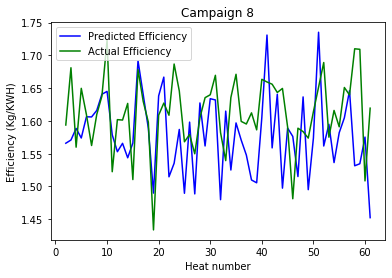

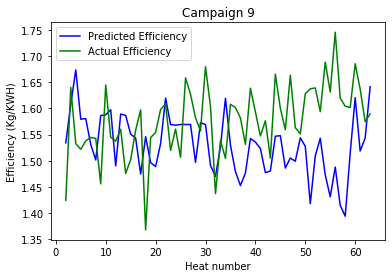

In [42]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

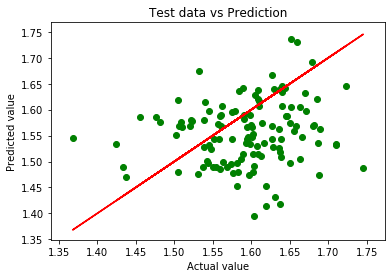

In [43]:
plt.scatter(y_test, y_pred_test, c='g')
plt.plot(y_test,y_test,c='r')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Test data vs Prediction')
plt.show()

In [44]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [45]:
from pickle import dump
dump(scaler1, open('scaler1.pkl', 'wb'))
dump(scaler2, open('scaler2.pkl', 'wb'))
